#E-commerce Shopping Cart Data Analysis

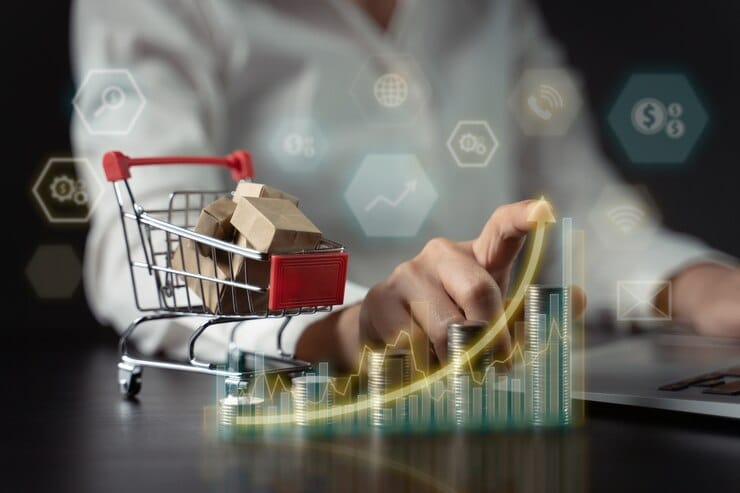

(Description)

## Importing libraries

In [ ]:
import pandas as pd
import difflib
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Importing files

In [ ]:
Customers_df=pd.read_csv("Customers.csv")
Order_df=pd.read_csv("Orders.csv")
Sales_df=pd.read_csv("Sales.csv")
Product_df=pd.read_csv("Products.csv")


# Customer sheet

Before Cleaning

In [ ]:
print("=== CUSTOMERS BEFORE CLEANING ===")
print("Shape:", Customers_df.shape)
print("Duplicates (by customer_id):", Customers_df.duplicated(subset="customer_id").sum())
print("Nulls per column:\n", Customers_df.isnull().sum())
print("Gender distribution before standardization:\n", Customers_df["gender"].value_counts(dropna=False))
print("Sample states before title-case:\n", Customers_df["state"].unique()[:10])

=== CUSTOMERS BEFORE CLEANING ===
Shape: (1001, 9)
Duplicates (by customer_id): 1
Nulls per column:
 customer_id      0
customer_name    0
gender           0
age              1
home_address     0
zip_code         0
city             1
state            0
country          0
dtype: int64
Gender distribution before standardization:
 gender
Male           143
Non-binary     131
Polygender     129
Genderqueer    127
Genderfluid    122
Bigender       120
Female         115
Agender        114
Name: count, dtype: int64
Sample states before title-case:
 ['Northern Territory' 'South Australia' 'Australian Capital Territory'
 'queensland' 'Queensland' 'New South Wales' 'Western Australia'
 'Victoria' 'Tasmania']


Processing And Preparing Data

In [ ]:
# Drop duplicate customers
print("\n-- Dropping duplicate customer_id rows --")
print("Shape before:", Customers_df.shape)
print("Duplicates before:", Customers_df.duplicated(subset="customer_id").sum())

Customers_df.drop_duplicates(subset="customer_id", keep="first", inplace=True)

print("Shape after:", Customers_df.shape)
print("Duplicates after:", Customers_df.duplicated(subset="customer_id").sum())

# Replace Other Genders to  “Prefer not to say”
gender_map = {
    "Genderfluid": "Prefer not to say",
    "Polygender" : "Prefer not to say",
    "Agender"    : "Prefer not to say",
    "Bigender"   : "Prefer not to say",
    "Non-binary" : "Prefer not to say",
    "Genderqueer": "Prefer not to say"
}
print("\n-- Replacing rare genders with 'Prefer not to say' --")
print("Distinct values before:", Customers_df["gender"].unique())

Customers_df["gender"] = Customers_df["gender"].replace(gender_map)

print("Distinct values after:", Customers_df["gender"].unique())

# Fill Missing ages with the median
print("\n-- Imputing missing ages with MEDIAN --")
print("Null ages before:", Customers_df["age"].isnull().sum())
print("Mean age:", Customers_df["age"].median())

Customers_df["age"] = Customers_df["age"].fillna(Customers_df["age"].median())

print("Null ages after:", Customers_df["age"].isnull().sum())

# Fill missing cities
print("\n-- Filling missing cities with 'Unknown' --")
print("Null cities before:", Customers_df["city"].isnull().sum())

Customers_df["city"] = Customers_df["city"].fillna("Unknown")

print("Null cities after:", Customers_df["city"].isnull().sum())

# Standradizing the state names
print("\n-- Standardizing 'state' names to title case --")
print("Sample states before:", list(Customers_df["state"].unique())[:5])

Customers_df["state"] = Customers_df["state"].str.title()

print("Sample states after:", list(Customers_df["state"].unique())[:5])



-- Dropping duplicate customer_id rows --
Shape before: (1001, 9)
Duplicates before: 1
Shape after: (1000, 9)
Duplicates after: 0

-- Replacing rare genders with 'Prefer not to say' --
Distinct values before: ['Female' 'Genderfluid' 'Polygender' 'Bigender' 'Agender' 'Male'
 'Genderqueer' 'Non-binary']
Distinct values after: ['Female' 'Prefer not to say' 'Male']

-- Imputing missing ages with MEDIAN --
Null ages before: 1
Mean age: 50.0
Null ages after: 0

-- Filling missing cities with 'Unknown' --
Null cities before: 1
Null cities after: 0

-- Standardizing 'state' names to title case --
Sample states before: ['Northern Territory', 'South Australia', 'Australian Capital Territory', 'queensland', 'Queensland']
Sample states after: ['Northern Territory', 'South Australia', 'Australian Capital Territory', 'Queensland', 'New South Wales']


After Cleaning

In [ ]:
print("\n=== CUSTOMERS AFTER CLEANING ===")
print("Shape:", Customers_df.shape)
print("Nulls per column:\n", Customers_df.isnull().sum())
print("Final gender distribution:\n", Customers_df["gender"].value_counts())



=== CUSTOMERS AFTER CLEANING ===
Shape: (1000, 9)
Nulls per column:
 customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64
Final gender distribution:
 gender
Prefer not to say    742
Male                 143
Female               115
Name: count, dtype: int64


# Order Sheet

Before Cleaning


In [ ]:
print("=== ORDERS BEFORE CLEANING ===")
print("Shape:", Order_df.shape)
print("Duplicates (by order_id):", Order_df.duplicated(subset="order_id").sum())
print("Nulls per column:\n", Order_df.isnull().sum())
print("Data types before datetime conversion:\n", Order_df.dtypes[["order_date", "delivery_date"]])


=== ORDERS BEFORE CLEANING ===
Shape: (1001, 5)
Duplicates (by order_id): 1
Nulls per column:
 order_id         0
customer_id      0
payment          1
order_date       1
delivery_date    0
dtype: int64
Data types before datetime conversion:
 order_date       object
delivery_date    object
dtype: object


Processing And Preparing Data

In [ ]:
# Drop duplicate orders
print("\n-- Dropping duplicate order_id rows --")
print("Shape before:", Order_df.shape)
print("Duplicates before:", Order_df.duplicated(subset="order_id").sum())

Order_df.drop_duplicates(subset="order_id", keep="first", inplace=True)

print("Shape after:", Order_df.shape)
print("Duplicates after:", Order_df.duplicated(subset="order_id").sum())

# Fill missing payment with MEDIAN
print("\n-- Imputing missing 'payment' with MEDIAN --")
print("Null payments before:", Order_df["payment"].isnull().sum())
print("Mean payment:", Order_df["payment"].median())

Order_df["payment"] = Order_df["payment"].fillna(Order_df["payment"].mean())

print("Null payments after:", Order_df["payment"].isnull().sum())

# Convert order_date & delivery_date to datetime
print("\n-- Converting date columns to datetime --")
print("Null dates before conversion:\n", Order_df[["order_date", "delivery_date"]].isnull().sum())

Order_df["order_date"] = pd.to_datetime(Order_df["order_date"], errors="coerce")
Order_df["delivery_date"] = pd.to_datetime(Order_df["delivery_date"], errors="coerce")

print("Null dates after conversion:\n", Order_df[["order_date", "delivery_date"]].isnull().sum())

# Replace missing dates with the MEAN timestamp
print("\n-- Imputing missing dates with MEAN timestamp --")
print("Null order_date before:", Order_df["order_date"].isnull().sum())
print("Null delivery_date before:", Order_df["delivery_date"].isnull().sum())
print("Mean order_date timestamp:", Order_df["order_date"].median())
print("Mean delivery_date timestamp:", Order_df["delivery_date"].median())

Order_df["order_date"]    = Order_df["order_date"].fillna(Order_df["order_date"].median())
Order_df["delivery_date"] = Order_df["delivery_date"].fillna(Order_df["delivery_date"].median())

print("Null order_date after:", Order_df["order_date"].isnull().sum())
print("Null delivery_date after:", Order_df["delivery_date"].isnull().sum())


-- Dropping duplicate order_id rows --
Shape before: (1001, 5)
Duplicates before: 1
Shape after: (1000, 5)
Duplicates after: 0

-- Imputing missing 'payment' with MEDIAN --
Null payments before: 1
Mean payment: 33692.0
Null payments after: 0

-- Converting date columns to datetime --
Null dates before conversion:
 order_date       1
delivery_date    0
dtype: int64
Null dates after conversion:
 order_date       1
delivery_date    1
dtype: int64

-- Imputing missing dates with MEAN timestamp --
Null order_date before: 1
Null delivery_date before: 1
Mean order_date timestamp: 2021-05-28 00:00:00
Mean delivery_date timestamp: 2021-06-11 00:00:00
Null order_date after: 0
Null delivery_date after: 0


After Cleaning

In [ ]:
print("\n=== ORDERS AFTER CLEANING ===")
print("Shape:", Order_df.shape)
print("Nulls per column:\n", Order_df.isnull().sum())
print("Data types after cleaning:\n", Order_df.dtypes[["order_date", "delivery_date"]])


=== ORDERS AFTER CLEANING ===
Shape: (1000, 5)
Nulls per column:
 order_id         0
customer_id      0
payment          0
order_date       0
delivery_date    0
dtype: int64
Data types after cleaning:
 order_date       datetime64[ns]
delivery_date    datetime64[ns]
dtype: object


# Sales Sheet

Before Cleaning


In [ ]:
print("=== SALES BEFORE CLEANING ===")
print("Shape:", Sales_df.shape)
print("Nulls per column:\n", Sales_df.isnull().sum())
print("\nBasic stats before cleaning:")
print(Sales_df[["price_per_unit", "quantity", "total_price"]].describe())

=== SALES BEFORE CLEANING ===
Shape: (5100, 6)
Nulls per column:
 sales_id            0
order_id            0
product_id          0
price_per_unit    479
quantity          511
total_price       514
dtype: int64

Basic stats before cleaning:
          quantity  total_price
count  4589.000000  4586.000000
mean      2.004576   207.110990
std       0.808481    86.656273
min       1.000000    90.000000
25%       1.000000   112.000000
50%       2.000000   204.000000
75%       3.000000   285.000000
max       3.000000   357.000000


Processing And Preparing Data

In [ ]:
# Rename total_price to total_revenue
print("\n-- Renaming 'total_price' to 'total_revenue' --")
print("Columns before:", list(Sales_df.columns))

Sales_df = Sales_df.rename(columns={"total_price": "total_revenue"})

print("Columns after:", list(Sales_df.columns))

#  Convert Columns to numeric
print("\n-- Converting price_per_unit, quantity, total_revenue to numeric --")
for col in ["price_per_unit", "quantity", "total_revenue"]:
    print(f"{col} nulls before conversion:", Sales_df[col].isnull().sum())
    Sales_df[col] = pd.to_numeric(Sales_df[col], errors="coerce")
    print(f"{col} nulls after conversion:", Sales_df[col].isnull().sum())

# Drop rows where all three are missing
print("\n-- Dropping rows where all three key metrics are null --")
print("Shape before:", Sales_df.shape)
Sales_df = Sales_df.dropna(subset=["price_per_unit", "quantity", "total_revenue"], how="all")
print("Shape after:", Sales_df.shape)

# Calculate missing values by using total_revenue = price_per_unit * quantity
print("\n-- Imputing missing values row-wise --")
null_counts_before = Sales_df[["price_per_unit", "quantity", "total_revenue"]].isnull().sum()
print("Null counts before imputation:\n", null_counts_before)

for idx, row in Sales_df.iterrows():
    if pd.isnull(row["price_per_unit"]) and pd.notnull(row["quantity"]) and pd.notnull(row["total_revenue"]):
        Sales_df.at[idx, "price_per_unit"] = row["total_revenue"] / row["quantity"]
    elif pd.isnull(row["quantity"]) and pd.notnull(row["price_per_unit"]) and pd.notnull(row["total_revenue"]):
        Sales_df.at[idx, "quantity"] = row["total_revenue"] / row["price_per_unit"]
    elif pd.isnull(row["total_revenue"]) and pd.notnull(row["price_per_unit"]) and pd.notnull(row["quantity"]):
        Sales_df.at[idx, "total_revenue"] = row["price_per_unit"] * row["quantity"]

null_counts_mid = Sales_df[["price_per_unit", "quantity", "total_revenue"]].isnull().sum()
print("Null counts after imputation:\n", null_counts_mid)

# Drop any remaining rows with nulls
print("\n-- Dropping rows with any remaining nulls in key metrics --")
print("Shape before:", Sales_df.shape)
Sales_df = Sales_df.dropna(subset=["price_per_unit", "quantity", "total_revenue"])
print("Shape after:", Sales_df.shape)


-- Renaming 'total_price' to 'total_revenue' --
Columns before: ['sales_id', 'order_id', 'product_id', 'price_per_unit', 'quantity', 'total_price']
Columns after: ['sales_id', 'order_id', 'product_id', 'price_per_unit', 'quantity', 'total_revenue']

-- Converting price_per_unit, quantity, total_revenue to numeric --
price_per_unit nulls before conversion: 479
price_per_unit nulls after conversion: 734
quantity nulls before conversion: 511
quantity nulls after conversion: 511
total_revenue nulls before conversion: 514
total_revenue nulls after conversion: 514

-- Dropping rows where all three key metrics are null --
Shape before: (5100, 6)
Shape after: (5098, 6)

-- Imputing missing values row-wise --
Null counts before imputation:
 price_per_unit    732
quantity          509
total_revenue     512
dtype: int64
Null counts after imputation:
 price_per_unit    136
quantity          105
total_revenue     119
dtype: int64

-- Dropping rows with any remaining nulls in key metrics --
Shape b

After Cleaning

In [ ]:
print("\n=== SALES AFTER CLEANING ===")
print("Final nulls per column:\n", Sales_df.isnull().sum())
print("\nBasic stats after cleaning:")
print(Sales_df[["price_per_unit", "quantity", "total_revenue"]].describe())



=== SALES AFTER CLEANING ===
Final nulls per column:
 sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_revenue     0
dtype: int64

Basic stats after cleaning:
       price_per_unit     quantity  total_revenue
count      4918.00000  4918.000000    4918.000000
mean        103.52989     1.997967     206.994713
std           9.18974     0.808736      86.510047
min          90.00000     1.000000      90.000000
25%          95.00000     1.000000     112.000000
50%         102.00000     2.000000     204.000000
75%         112.00000     3.000000     285.000000
max         119.00000     3.000000     357.000000


# Product Sheet

Processing And Preparing Data

In [ ]:
bef_clean=pd.read_csv("Products.csv")
Product_df.drop_duplicates(subset=["product_ID"],keep="first",inplace=True)

# Valid Values
valid_types = ['Shirt', 'Jacket', 'Trousers']
def correct_product_type(product):

    # to lower
    product = product.lower()
    # mathces to the valid type
    matches = difflib.get_close_matches(product, valid_types, n=1, cutoff=0.6)
    return matches[0] if matches else product

# Apply the method the columns
Product_df['product_type'] = Product_df['product_type'].apply(correct_product_type)
# droping null values in the product name
Product_df.dropna(subset=["product_name"],inplace=True)
print(Product_df["product_name"].isnull().sum())

# valid values
accepted_sizes = {"xs", "s", "m", "l", "xl"}

def clean_size(size):
# to lower
    size = str(size).lower()
# split the string when face a non letter
    tokens = re.split(r'[^a-z]', size)
# check if its accepted
    for token in tokens:
        if token in accepted_sizes:
            return token
    return None

# Apply the cleaning function to the 'size' column.
Product_df['size'] = Product_df['size'].apply(clean_size)

accepted_colors = {"red", "blue", "green", "yellow", "black", "white", "orange", "purple", "pink", "brown",
                   "grey","indigo","violet"}

def clean_color(value):

#to lower
    value = str(value).lower()

# Spliting.
    tokens = re.split(r'[^a-z]', value)

# Checking
    for token in tokens:
        if token in accepted_colors:
            return token
    return None

Product_df["colour"]=Product_df["colour"].apply(clean_color)


# Calculate IQR
Q1 = Product_df['price'].quantile(0.25)
Q3 = Product_df['price'].quantile(0.75)
IQR = Q3 - Q1

# caluculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# replace outliers with the median
median_price = Product_df['price'].median()
Product_df['price'] = Product_df['price'].clip(lower=lower_bound, upper=upper_bound, axis=0)
Product_df['price'] = Product_df['price'].fillna(median_price)

#Product_df.drop(columns="description",inplace=True)


0


Before Vs After Statistics

In [ ]:
print(bef_clean[["price","quantity"]].describe())
print("Before vs After cleaning")
print(Product_df[["price","quantity"]].describe())

             price     quantity
count  1260.000000  1260.000000
mean    197.457143    57.106349
std     401.970103    17.352024
min      90.000000     0.000000
25%      96.000000    49.000000
50%     109.000000    59.000000
75%     115.000000    70.000000
max    2142.000000    80.000000
Before vs After cleaning
             price     quantity
count  1008.000000  1008.000000
mean    107.517857    57.000000
std      12.545970    17.502844
min      90.000000     0.000000
25%      96.000000    48.000000
50%     109.000000    59.000000
75%     115.000000    70.000000
max     143.500000    80.000000


### Products Visualization

## Exporting Cleaned Files

In [ ]:
""" Customers_df.to_csv("C:/Users/hp/OneDrive/Desktop/Data analysis projects/Depi project/customerDF.csv",index=False)
Product_df.to_csv("C:/Users/hp/OneDrive/Desktop/Data analysis projects/Depi project/ProductDF.csv",index=False)
Order_df.to_csv("C:/Users/hp/OneDrive/Desktop/Data analysis projects/Depi project/OrdersDF.csv",index=False)
Sales_DF.to_csv("C:/Users/hp/OneDrive/Desktop/Data analysis projects/Depi project/SalesDF.csv",index=False) """

' Customers_df.to_csv("C:/Users/hp/OneDrive/Desktop/Data analysis projects/Depi project/customerDF.csv",index=False)\nProduct_df.to_csv("C:/Users/hp/OneDrive/Desktop/Data analysis projects/Depi project/ProductDF.csv",index=False)\nOrder_df.to_csv("C:/Users/hp/OneDrive/Desktop/Data analysis projects/Depi project/OrdersDF.csv",index=False)\nSales_DF.to_csv("C:/Users/hp/OneDrive/Desktop/Data analysis projects/Depi project/SalesDF.csv",index=False) '